In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_bonds()], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-26 to 2019-06-06'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 4) & (stat['21-mean'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
VTEB,50,1.078846,0.398780,2.260047,0.333713
MUB,50,1.058080,0.390219,2.256415,0.409122
VCIT,50,1.168846,0.648186,1.529286,0.502684
LQD,50,1.328933,0.855696,1.345512,0.743382
VCLT,50,1.856651,1.258666,1.334006,1.036422
BLV,50,2.070120,1.501647,1.260308,1.732519
VCSH,50,0.558059,0.304484,1.249578,0.282660
PGX,50,0.695935,0.416031,1.245945,1.237112
BND,50,0.954531,0.635378,1.222812,0.703167


In [3]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['VTEB', 'MUB'] -2.3893969697609045 1.941356214518584 0.185708812622997 -4.5164619969024855
['VTEB', 'VCIT'] -2.582884589792644 0.9973495877867222 0.20909914996766435 -3.7893333275470304
['VTEB', 'LQD'] -2.7614052920863577 0.5748805664246066 0.26927369682858004 -3.6055595553395445
['VTEB', 'VCLT'] -2.8536239210418284 0.3978954393503913 0.3425338360571131 -3.5940531964493325
['VTEB', 'PGX'] -3.6785004816371254 -0.5652140403250914 0.39270627876547815 -3.5059927200775123
['MUB', 'PGX'] -3.8530226418184363 -0.7622210426867058 0.41155855302381983 -3.5023601521555503


['MUB', 'PGX']

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['MUB', 'PGX'], 0, 1)

['PGX', 'VTEB'] -3.6785004816371254 -0.5652140403250914 0.39270627876547815 -3.5059927200775123


['PGX', 'VTEB']

In [5]:
quote.setup_mask(['PGX', 'MUB'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 PGX    0.47678
 MUB    0.52322
 dtype: float64, 0.8854, 0.224)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,50.0,0.883109,0.224241,0.420316,0.734339,0.898459,1.051681,1.278754,3.146278,0.337480
MUB,50.0,1.058080,0.390219,0.256944,0.784552,1.121005,1.350647,1.685346,2.256415,0.409122
PGX,50.0,0.695935,0.416031,-0.362674,0.450043,0.633834,0.992653,1.719726,1.245945,1.237112


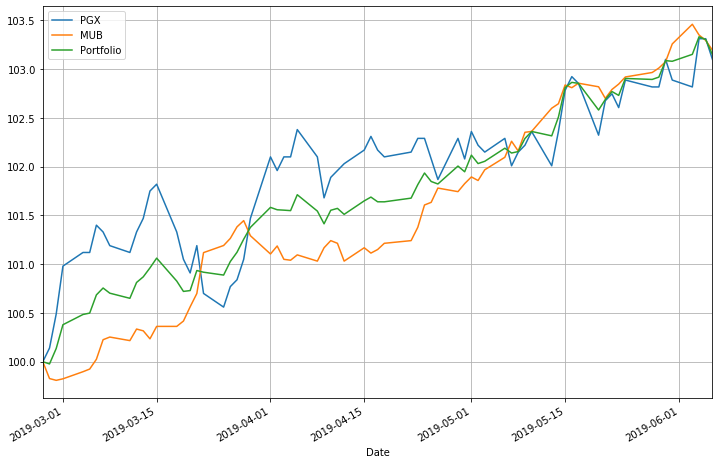

In [6]:
quote.graph(21, {'MUB': .52, 'PGX': .48})